In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import tensorflow_probability as tfp
from tqdm import trange
from scipy import stats
tfk = tf.keras
import json
import sys, os

In [8]:
# load in all the CENSORED results
datadir = "/data80/makinen/fishnets/gamma_pop/data/"
parentdir = "/data80/makinen/fishnets/gamma_pop/results/"

censored_small_theta = np.load(datadir + 'theta_gamma_censored.npy')
censored_big_theta = np.load(datadir + "theta_censored_test_ndata_10k.npy")

censored_small_mles = [np.load(parentdir + "model_censored_%d/checkpoint_4/mle.npy"%(i)) for i in range(11)]
censored_big_mles = [np.load(parentdir + "model_censored_%d/test_mle.npy"%(i)) for i in range(11)]

# load in all UNCENSORED results

uncensored_big_theta = np.load(datadir + 'theta_uncensored_10k.npy')
uncensored_small_theta = np.load(datadir + 'theta_gamma_uncensored.npy')

uncensored_small_mles = [np.load(parentdir + "model_%d/checkpoint_4/mle.npy"%(i)) for i in range(11)]
uncensored_big_mles = [np.load(parentdir + "model_%d/test_mle.npy"%(i)) for i in range(11)]

In [45]:
# MSEs for CENSORED data
censored_small_mses = np.array([np.mean((censored_small_mles[i] - censored_small_theta)**2) for i in range(11)])
censored_big_mses = np.array([np.mean((censored_big_mles[i] - censored_big_theta)**2) for i in range(11)])

In [48]:
mse_loss = np.array([np.mean((ensemble_mles[i] - pmle_)**2) for i in range(10)])

mse_loss_small = np.array([np.mean((ensemble_mles_small[i] - small_pmle_)**2) for i in range(10)])

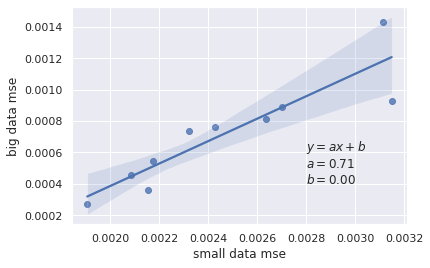

In [77]:
import scipy.stats
import seaborn as sns
sns.set()

linreg = scipy.stats.linregress(x=mse_loss_small, y=mse_loss)

_x = np.linspace(0.0018, 0.004, 50)
_y = _x*linreg.slope + linreg.intercept

sns.regplot(x=mse_loss_small, y=mse_loss)
plt.text(0.0028, 0.0004, s='$y=ax+b$\n$a=$%.2f\n$b=$%.2f'%(linreg.slope, -linreg.intercept))

plt.xlabel('small data mse')
plt.ylabel('big data mse')
plt.show()

In [51]:
mle = np.average(ensemble_mles, axis=0, weights=np.exp(mse_loss))

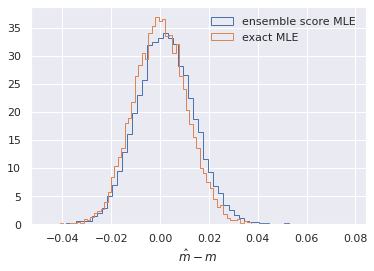

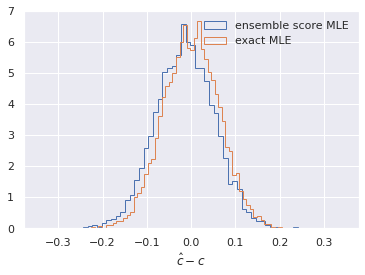

In [78]:
plt.hist(mle[:,0] - theta[:,0].numpy(), bins = 60, histtype='step', density=True, label='ensemble score MLE')
plt.hist(pmle_[:,0] - theta[:,0].numpy(), bins = 60, histtype='step', density=True, label='exact MLE')
std = np.std(pmle_[:,0] - theta[:,0].numpy())
x = np.linspace(-4*std, 4*std, 500)

plt.xlabel('$\hat{m} - m$')
plt.legend(frameon=False)
plt.show()
# plt.savefig(outdir + 'm_plot_test.png')
# plt.close()

plt.hist(mle[:,1] - theta[:,1].numpy(), bins = 60, histtype='step', density=True, label='ensemble score MLE')
plt.hist(pmle_[:,1] - theta[:,1].numpy(), bins = 60, histtype='step', density=True, label='exact MLE')
std = np.std(pmle_[:,1] - theta[:,1].numpy())
x = np.linspace(-4*std, 4*std, 500)

plt.xlim(-6*std, 6*std)

plt.xlabel('$\hat{c} - c$')
plt.legend(frameon=False)
plt.show()
# plt.savefig(outdir + 'c_plot_test.png')
# plt.close()